In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [17]:
supbat=cast[(cast.character=='Superman') | (cast.character=='Batman')]
supbat=supbat.groupby(['year', 'character']).size()
supbat=supbat.unstack()
supbat=supbat.fillna(0)

In [25]:
s=supbat['Superman']-supbat['Batman']
print(s[s>0].count(), 'years are Superman years')


12 years are Superman years


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [26]:
b=supbat['Batman']-supbat['Superman']
print(b[b>0].count(), 'years are Batman years')

24 years are Batman years


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

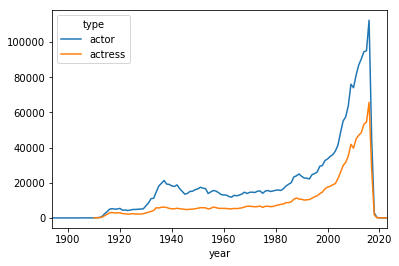

In [34]:
torss=cast.groupby('year').type.value_counts()
torss=torss.unstack()
torss.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

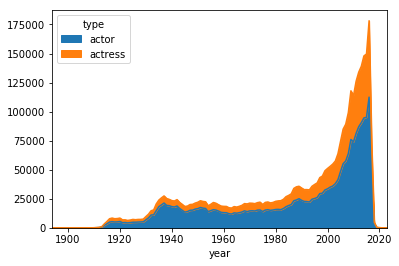

In [35]:
torss.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

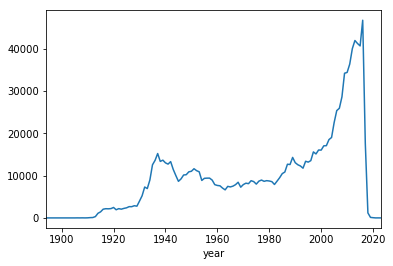

In [51]:
torss=torss.fillna(0)
torss['diff']=abs(torss['actress']-torss['actor'])
torss.loc[:, 'diff'].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

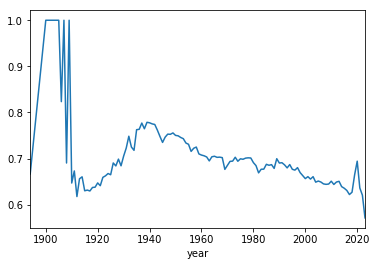

In [55]:
torss['frac']=torss['actor']/(torss['actor']+torss['actress'])
torss.loc[:, 'frac'].plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

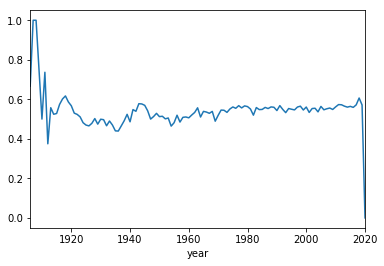

In [99]:
two=cast[cast.n==2].groupby('year').type.value_counts().unstack().fillna(0)
two['fractor']=two['actor']/(two['actor']+two['actress'])
two.loc[:, 'fractor'].plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

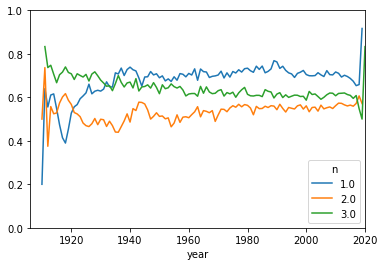

In [109]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])